In [83]:
import numpy as np
import matplotlib.pyplot as plt

class NoisyLIFNeuron:
    def __init__(self, tau, R, threshold, sigma,we=0.1,wi=0.1, dt=0.01):
        self.tau = tau  # Membrane time constant
        self.R = R      # Membrane resistance
        self.threshold = threshold  # Firing threshold
        self.sigma = sigma #Amplitude of the noise (in units of voltage)
        self.dt = dt    # Time step
        self.we = we
        self.wi = wi
        self.reset()

    def reset(self):
        self.voltage = 0.0  # Initial membrane potential

    def update(self, I, exc, inh):
        # Membrane potential update using Euler method
        dv = (-(self.voltage) + self.R * I) / self.tau * self.dt + self.sigma*np.sqrt(self.dt)*np.random.normal(0, 1)
        self.voltage += dv
        if exc:
            self.voltage += self.we
        if inh:
            self.voltage -= self.wi
        # Check for spike
        if self.voltage >= self.threshold:
            self.voltage = 0.0  # Reset membrane potential after spike
            return True
        else:
            return False

def simulate_neuron(I, tau, R, threshold, sigma, spikes_bg_e,spikes_bg_i, we, wi, dt=0.01, duration=10):
    neuron = NoisyLIFNeuron(tau, R, threshold, sigma,we,wi, dt)
    time = np.arange(0, duration, dt)
    spikes = []
    voltages = []
    for t in time:
        exc = False
        inh = False
        if t in spikes_bg_e:
            exc = True
        if t in spikes_bg_i:
            inh = True
        spike = neuron.update(I, exc, inh)
        voltages.append(neuron.voltage)
        if spike:
            spikes.append(t)
    return spikes, voltages


def background(dt, t, N_background, lambda_, tau, seed):
    np.random.seed(seed)  # Set seed for reproducibility
    bg = 0
    spikes_bg = []
    for j in range(N_background):
        # Generate Poisson process
        events = np.random.poisson(lambda_ * dt, len(t))
        events[events > 1] = 1  # Ensure at most one event per timestep

        #obtain spike times
        spikes_temp = events*t
        spike_times = spikes_temp[spikes_temp != 0]
        spikes_bg = np.concatenate((spikes_bg,spike_times))
    return spikes_bg



In [88]:
# Simulation parameters
tau = 10 # Membrane time constant (ms)
R = 1    # Membrane resistance
threshold = 1 # Firing threshold
sigma = 0  #NO STOCHASTIC NOISE
dt = 0.01 # Time step (ms)
duration = 20000  # Duration of simulation (ms)
t=np.arange(0, duration, dt)

I = 0.8  # Input current (arbitrary units)

lambda_hz_e = 16  # Rate of the Poisson process (in Hz) (of each single background neuron)
lambda_e = lambda_hz_e/1e3  # Rate of the Poisson process (events per unit time (spikes/ms))
N_bg_e = 100
w_e = 0.05 #synaptic weight

lambda_hz_i = 16 # Rate of the Poisson process (in Hz)
lambda_i = lambda_hz_i/1e3  # Rate of the Poisson process (events per unit time (spikes/ms))
N_bg_i = 100
w_i = 0.05 #synaptic weight

spikes_bg_e = background(dt,t,N_bg_e, lambda_e, tau, seed = 123)
spikes_bg_i = background(dt,t,N_bg_i, lambda_i, tau, seed = 321)



spikes, voltages = simulate_neuron(I, tau, R, threshold, sigma, spikes_bg_e, spikes_bg_i, w_e, w_i, dt, duration)
u =  voltages

[11.42, 115.9, 151.36, 194.05, 246.39000000000001, 346.45, 369.51, 396.86, 475.41, 502.5, 547.3100000000001, 581.44, 597.25, 608.34, 645.48, 747.25, 789.9300000000001, 805.23, 865.91, 924.79, 942.28, 969.48, 1020.1800000000001, 1115.8, 1232.82, 1250.08, 1319.9, 1335.82, 1356.74, 1393.79, 1416.18, 1445.99, 1488.05, 1505.48, 1523.82, 1556.5, 1582.14, 1601.93, 1623.18, 1693.82, 1720.89, 1771.1000000000001, 1787.66, 1869.72, 1903.21, 1934.3400000000001, 1990.03, 2051.67, 2085.9, 2103.05, 2130.44, 2224.4500000000003, 2242.82, 2259.9, 2307.84, 2349.84, 2405.5, 2437.87, 2472.07, 2484.04, 2588.77, 2610.29, 2629.2200000000003, 2648.9900000000002, 2690.04, 2747.4700000000003, 2833.63, 2851.4, 2868.98, 2895.86, 3014.85, 3032.31, 3111.44, 3140.07, 3170.0, 3199.48, 3221.06, 3275.33, 3294.66, 3356.36, 3404.58, 3444.0, 3468.2400000000002, 3529.29, 3676.81, 3725.64, 3780.4, 3806.63, 3814.58, 3858.48, 3871.42, 3988.39, 4007.1, 4103.43, 4156.29, 4196.36, 4213.17, 4242.92, 4283.82, 4305.24, 4337.49, 4394

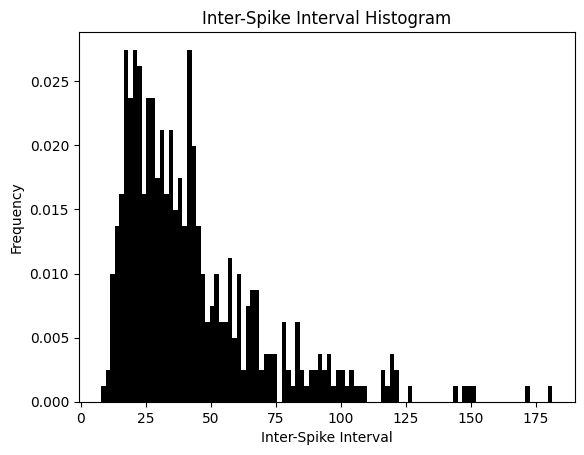

In [99]:
print(spikes)
isi = np.diff(spikes)

# Plot ISI histogram
plt.hist(isi, bins=100, density=True, color = 'black')
plt.xlabel('Inter-Spike Interval')
plt.ylabel('Frequency')
plt.title('Inter-Spike Interval Histogram')
plt.show()

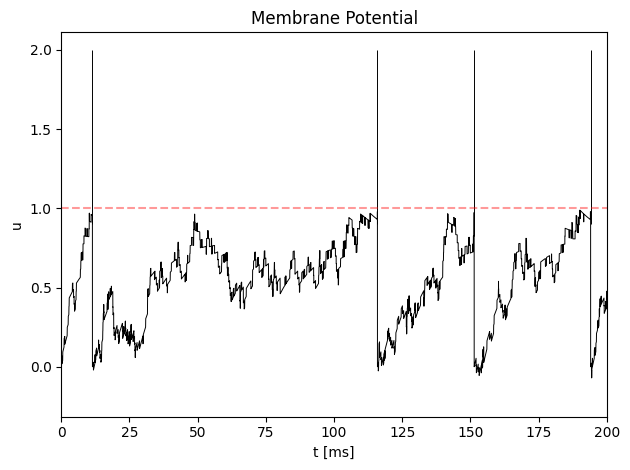

In [91]:

# Plot data on the second subplot
plt.plot(t, u, color = 'black', linewidth = 0.7)
plt.vlines(spikes, ymin=0.9, ymax=2, colors= 'black', linestyles='-', linewidth = 0.7)
plt.axhline(y=threshold, color='red', linestyle='--', alpha=0.4)

plt.title('Membrane Potential')
plt.xlabel('t [ms]')
plt.ylabel('u')
plt.xlim(0,200)
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
